In [215]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/Users/avigailvantu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [102]:
comp = pd.read_csv('Housing_Maintenance_Code_Complaints.csv')
prob = pd.read_csv('Complaint_Problems.csv')
bbl = pd.read_csv('pluto.csv')
pop_b = pd.read_csv('NYC_Population_by_Borough.csv')

In [142]:
print(comp.shape)
print(prob.shape)


(1114739, 15)
(2057764, 18)


In [73]:
print "  these are the complains columns:", comp.columns
                                            

print "  these are the problems columns:", prob.columns

  these are the complains columns: Index([u'ComplaintID', u'BuildingID', u'BoroughID', u'Borough', u'HouseNumber',
       u'StreetName', u'Zip', u'Block', u'Lot', u'Apartment',
       u'CommunityBoard', u'ReceivedDate', u'StatusID', u'Status',
       u'StatusDate'],
      dtype='object')
  these are the problems columns: Index([u'ProblemID', u'ComplaintID', u'UnitTypeID', u'UnitType',
       u'SpaceTypeID ', u'SpaceType', u'TypeID', u'Type', u'MajorCategoryID',
       u'MajorCategory', u'MinorCategoryID', u'MinorCategory', u'CodeID',
       u'Code', u'StatusID', u'Status', u'StatusDate', u'StatusDescription'],
      dtype='object')


In [74]:
print " number of problems:",len(prob)
print " number of complaints:", len(comp)

 number of problems: 2057764
 number of complaints: 1114739


In [250]:
# the share of the compliants by borough
print "MN", float(252310)/float(1114739)
print "BX", float(343269)/float(1114739)
print "BK", float(358524)/float(1114739)
print "QN", float(144949)/float(1114739)
print "SI", float(15687)/float(1114739)


MN 0.22633997734
BX 0.307936656024
BK 0.321621473726
QN 0.130029540547
SI 0.0140723523623


### borough key: 
MN = 1 
BX = 2
BK = 3
QN = 4
SI = 5




In [96]:
# total nuimber of complaints per borough
print "MN complaints", len(comp[comp['BoroughID']== 1])
print "BX complaints", len(comp[comp['BoroughID']== 2])
print "BK complaints", len(comp[comp['BoroughID']== 3])
print "QN complaints", len(comp[comp['BoroughID']== 4])
print "SI complaints", len(comp[comp['BoroughID']== 5])

MN complaints 252310
BX complaints 343269
BK complaints 358524
QN complaints 144949
SI complaints 15687


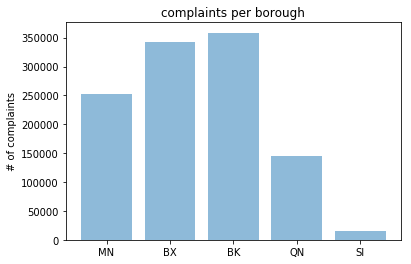

In [101]:
#ploting complaints per boroughs
borough = ('MN', 'BX', 'BK', 'QN', 'SI')
y_pos = np.arange(len(borough))
complaints = [252310,343269,358524,144949,15687]

plt.bar(y_pos, complaints, align='center', alpha=0.5)
plt.xticks(y_pos, borough)
plt.ylabel('# of complaints')
plt.title('complaints per borough')
 
plt.show()

In [258]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://my_site.com/my_picture.jpg")

Image(url= "http://www1.nyc.gov/assets/planning/images/content/pages/data-maps/nyc-population/dcp-pop-change-2010-2016.jpg", width=500, height=500)

In [275]:
print "NYC total popluation", float(1643734)+float(1455720)+float(2629150)+float(2333054)+float(476015)

NYC total popluation 8537673.0


In [282]:
# share of total poluaiton per borough 

print "MN pop %", float(1643734)/float(8537673)*100
print "BX pop %", float(1455720)/float(8537673)*100
print "BK pop %", float(2629150)/float(8537673)*100
print "QN pop %", float(2333054)/float(8537673)*100
print "SI pop %", float(476015)/float(8537673)*100

MN pop % 19.2527167531
BX pop % 17.0505476141
BK pop % 30.7946907782
QN pop % 27.3265795024
SI pop % 5.57546535221


In [287]:
# check they all sum up together to 100% 
a = float(1643734)/float(8537673)*100
b = float(1455720)/float(8537673)*100
c = float(2629150)/float(8537673)*100
d = float(2333054)/float(8537673)*100
e = float(476015)/float(8537673)*100

print float(a)+float(b)+float(c)+float(d)+float(e)

100.0


In [259]:
# cimpliants per capita: 
# acording to DCP pop estiamates 

print "MN", float(252310)/float(1643734)
print "BX", float(343269)/float(1455720)
print "BK", float(358524)/float(2629150)
print "QN", float(144949)/float(2333054)
print "SI", float(15687)/float(476015)

MN 0.153498072072
BX 0.235807023329
BK 0.136364984881
QN 0.0621284376615
SI 0.03295484386


In [260]:
# compliants per houshold unit: 
print "MN", float(252310)/float(763846)
print "BX", float(343269)/float(483449)
print "BK", float(358524)/float(916856)
print "QN", float(144949)/float(780117)
print "SI", float(15687)/float(165516)

MN 0.330315272974
BX 0.710041803789
BK 0.391036324134
QN 0.185804180655
SI 0.0947763358225


In [125]:
3123068/252310

12

In [77]:
comp.head(10)

,ComplaintID,BuildingID,BoroughID,Borough,HouseNumber,StreetName,Zip,Block,Lot,Apartment,CommunityBoard,ReceivedDate,StatusID,Status,StatusDate
0,6960137,3418,1,MANHATTAN,1989,ADAM C POWELL BOULEVARD,10026.0,1904,4,12D,10,07/07/2014,2,CLOSE,07/29/2014
1,6960832,3512,1,MANHATTAN,2267,ADAM C POWELL BOULEVARD,10030.0,1918,4,3B,10,07/08/2014,2,CLOSE,07/12/2014
2,6946867,5318,1,MANHATTAN,778,11 AVENUE,10019.0,1083,1,4P,4,06/19/2014,2,CLOSE,07/13/2014
3,6966946,5608,1,MANHATTAN,1640,AMSTERDAM AVENUE,10031.0,2073,29,5A,9,07/16/2014,2,CLOSE,07/21/2014
4,6956574,17896,1,MANHATTAN,230,EAST 88 STREET,10128.0,1533,32,1E,8,07/01/2014,2,CLOSE,07/09/2014
5,6959035,19899,1,MANHATTAN,428,EAST 117 STREET,10035.0,1710,36,3D,11,07/04/2014,2,CLOSE,07/10/2014
6,6924412,25304,1,MANHATTAN,498,MANHATTAN AVENUE,10027.0,1947,47,4,10,05/21/2014,2,CLOSE,07/04/2014
7,6944891,32017,1,MANHATTAN,351,WEST 29 STREET,10001.0,753,10,25,4,06/17/2014,2,CLOSE,07/22/2014
8,6961276,37344,1,MANHATTAN,209,WEST 101 STREET,10025.0,1873,24,PH,7,07/08/2014,2,CLOSE,07/11/2014
9,6959795,41208,1,MANHATTAN,315,WEST 138 STREET,10030.0,2041,40,6,10,07/07/2014,2,CLOSE,07/16/2014


#ReceivedDate: from: 1/1/2015  to 12/31/2016 (there are 4 earlier complaints: 1 from 2009 and 3 from 2014)




In [83]:
# in order to validate my method of getting BBL's I manually looked up a few of the addresses
#here http://nycprop.nyc.gov/nycproperty/nynav/jsp/stmtassesslst.jsp 
#conclusion: BoroughID/ Block/ Lot

In [137]:
bbl.head()

,the_geom,bbl
0,0106000020E61000000100000001030000000100000004...,3015870001
1,0106000020E61000000100000001030000000100000005...,1000190008
2,0106000020E61000000100000001030000000100000005...,1001527501
3,0106000020E61000000100000001030000000100000005...,3009200052
4,0106000020E61000000100000001030000000100000004...,3003820016


In [132]:
len(prob[prob['Type']== 'EMERGENCY'])
len(prob[prob['Type']== 'NON EMERGENCY'])

733431

range of dates for the data: 

In [231]:
prob.head(10)

,ProblemID,ComplaintID,UnitTypeID,UnitType,SpaceTypeID,SpaceType,TypeID,Type,MajorCategoryID,MajorCategory,MinorCategoryID,MinorCategory,CodeID,Code,StatusID,Status,StatusDate,StatusDescription
0,17307278,8412850,91,APARTMENT,543,ENTIRE APARTMENT,1,EMERGENCY,56,DOOR/WINDOW,337,WINDOW FRAME,2836,LOOSE OR DEFECTIVE,2,CLOSE,03/31/2017,The Department of Housing Preservation and Dev...
1,17317058,8417365,91,APARTMENT,543,ENTIRE APARTMENT,3,NON EMERGENCY,63,UNSANITARY CONDITION,376,PESTS,2821,MICE,2,CLOSE,03/16/2017,The Department of Housing Preservation and Dev...
2,17016467,8249017,91,APARTMENT,545,ENTRANCE/FOYER,1,EMERGENCY,56,DOOR/WINDOW,333,DOOR,2665,LOCK BROKEN OR MISSING,2,CLOSE,03/03/2017,The Department of Housing Preservation and Dev...
3,14548958,6967900,91,APARTMENT,541,BATHROOM,1,EMERGENCY,9,PLUMBING,63,BATHTUB/SHOWER,2538,BROKEN OR MISSING,2,CLOSE,07/29/2014,The Department of Housing Preservation and De...
4,14548959,6967900,91,APARTMENT,541,BATHROOM,3,NON EMERGENCY,9,PLUMBING,63,BATHTUB/SHOWER,2540,FAUCET BROKEN/MISSING/LEAKING,2,CLOSE,08/04/2014,The Department of Housing Preservation and De...
5,14548960,6967900,91,APARTMENT,543,ENTIRE APARTMENT,3,NON EMERGENCY,58,FLOORING/STAIRS,343,FLOOR,2691,TILE BROKEN OR MISSING,2,CLOSE,08/04/2014,The Department of Housing Preservation and De...
6,14548961,6967900,91,APARTMENT,541,BATHROOM,3,NON EMERGENCY,9,PLUMBING,63,BATHTUB/SHOWER,2541,CHIPPED OR RUSTED,2,CLOSE,08/04/2014,The Department of Housing Preservation and De...
7,14615271,6994958,20,APARTMENT,68,ENTIRE APARTMENT,1,EMERGENCY,59,HEAT/HOT WATER,349,ENTIRE BUILDING,2717,NO HOT WATER,2,CLOSE,08/22/2014,The Department of Housing Preservation and De...
8,14568548,6977138,91,APARTMENT,542,BEDROOM,4,IMMEDIATE EMERGENCY,28,PAINT/PLASTER,197,CEILING,2520,COLLAPSING OR FALLING,2,CLOSE,07/29/2014,The Department of Housing Preservation and De...
9,14568549,6977138,91,APARTMENT,542,BEDROOM,3,NON EMERGENCY,28,PAINT/PLASTER,198,WALL,1364,BULGING/HOLE/CRACKED,2,CLOSE,07/29/2014,The Department of Housing Preservation and De...


In [146]:
prob.isnull().sum()

ProblemID                0
ComplaintID              0
UnitTypeID               0
UnitType                 0
SpaceTypeID              0
SpaceType                0
TypeID                   0
Type                     0
MajorCategoryID          0
MajorCategory            0
MinorCategoryID          0
MinorCategory            0
CodeID                   0
Code                 91855
StatusID                 0
Status                   0
StatusDate             136
StatusDescription     6417
dtype: int64

In [138]:
prob.UnitType.unique()

array(['APARTMENT', 'BUILDING-W', 'PUBLIC PAR', 'PUBLIC ARE', 'BUILDING'], dtype=object)

In [267]:
# problems major category and the # of each 
print' number of major problem catogories:' ,len(prob.MajorCategory.unique())
print 'door/ window', len(prob[prob['MajorCategory']== 'DOOR/WINDOW'])
print 'UNSANITARY CONDITION', len(prob[prob['MajorCategory']== 'UNSANITARY CONDITION'])
print 'PLUMBING', len(prob[prob['MajorCategory']== 'PLUMBING'])
print 'FLOORING/STAIRS', len(prob[prob['MajorCategory']== 'FLOORING/STAIRS'])
print 'HEAT/HOT WATER', len(prob[prob['MajorCategory']== 'HEAT/HOT WATER'])
print 'PAINT/PLASTER', len(prob[prob['MajorCategory']== 'PAINT/PLASTER'])
print 'ELECTRIC', len(prob[prob['MajorCategory']== 'ELECTRIC'])
print 'GENERAL', len(prob[prob['MajorCategory']== 'GENERAL'])
print 'WATER LEAK', len(prob[prob['MajorCategory']== 'WATER LEAK'])
print 'APPLIANCE', len(prob[prob['MajorCategory']== 'APPLIANCE'])
print 'NONCONST', len(prob[prob['MajorCategory']== 'NONCONST'])
print 'OUTSIDE BUILDING', len(prob[prob['MajorCategory']== 'OUTSIDE BUILDING'])
print 'SAFETY', len(prob[prob['MajorCategory']== 'SAFETY'])
print 'HEATING', len(prob[prob['MajorCategory']== 'HEATING'])
print 'ELEVATOR', len(prob[prob['MajorCategory']== 'ELEVATOR'])
print 'CONSTRUCTION', len(prob[prob['MajorCategory']== 'CONSTRUCTION'])


 number of major problem catogories: 16
door/ window 146129
UNSANITARY CONDITION 297575
PLUMBING 199167
FLOORING/STAIRS 102182
HEAT/HOT WATER 635063
PAINT/PLASTER 243653
ELECTRIC 104648
GENERAL 95351
WATER LEAK 122624
APPLIANCE 48302
NONCONST 337
OUTSIDE BUILDING 6820
SAFETY 51705
HEATING 360
ELEVATOR 3841
CONSTRUCTION 7


In [272]:
len(prob)

2057764

In [274]:
# share of each problem category 

#print' number of major problem catogories:' ,len(prob.MajorCategory.unique()) / 
print 'door/ window', len(prob[prob['MajorCategory']== 'DOOR/WINDOW']) / float(2057764)
print 'UNSANITARY CONDITION', len(prob[prob['MajorCategory']== 'UNSANITARY CONDITION'])/ float(2057764)
print 'PLUMBING', len(prob[prob['MajorCategory']== 'PLUMBING'])/ float(2057764)
print 'FLOORING/STAIRS', len(prob[prob['MajorCategory']== 'FLOORING/STAIRS']) / float(2057764)
print 'HEAT/HOT WATER', len(prob[prob['MajorCategory']== 'HEAT/HOT WATER'])/ float(2057764)
print 'PAINT/PLASTER', len(prob[prob['MajorCategory']== 'PAINT/PLASTER'])/ float(2057764)
print 'ELECTRIC', len(prob[prob['MajorCategory']== 'ELECTRIC'])/ float(2057764)
print 'GENERAL', len(prob[prob['MajorCategory']== 'GENERAL'])/ float(2057764)
print 'WATER LEAK', len(prob[prob['MajorCategory']== 'WATER LEAK'])/ float(2057764)
print 'APPLIANCE', len(prob[prob['MajorCategory']== 'APPLIANCE'])/ float(2057764)
print 'NONCONST', len(prob[prob['MajorCategory']== 'NONCONST'])/ float(2057764)
print 'OUTSIDE BUILDING', len(prob[prob['MajorCategory']== 'OUTSIDE BUILDING'])/ float(2057764)
print 'SAFETY', len(prob[prob['MajorCategory']== 'SAFETY'])/ float(2057764)
print 'HEATING', len(prob[prob['MajorCategory']== 'HEATING'])/ float(2057764)
print 'ELEVATOR', len(prob[prob['MajorCategory']== 'ELEVATOR'])/ float(2057764)
print 'CONSTRUCTION', len(prob[prob['MajorCategory']== 'CONSTRUCTION'])/ float(2057764)


door/ window 0.0710134884272
UNSANITARY CONDITION 0.144610849446
PLUMBING 0.0967880670475
FLOORING/STAIRS 0.0496568119571
HEAT/HOT WATER 0.308617995066
PAINT/PLASTER 0.118406678317
ELECTRIC 0.0508552001104
GENERAL 0.0463371892987
WATER LEAK 0.059590895749
APPLIANCE 0.0234730513314
NONCONST 0.000163769995004
OUTSIDE BUILDING 0.00331427705024
SAFETY 0.0251267881059
HEATING 0.000174947175672
ELEVATOR 0.00186658917155
CONSTRUCTION 3.40175063807e-06


In [140]:
prob.MajorCategory.unique()

array(['DOOR/WINDOW', 'UNSANITARY CONDITION', 'PLUMBING',
       'FLOORING/STAIRS', 'HEAT/HOT WATER', 'PAINT/PLASTER', 'ELECTRIC',
       'GENERAL', 'WATER LEAK', 'APPLIANCE', 'NONCONST',
       'OUTSIDE BUILDING', 'SAFETY', 'HEATING', 'ELEVATOR', 'CONSTRUCTION'], dtype=object)

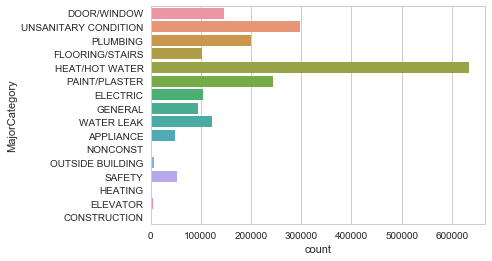

In [153]:
#visualizing probplems by catagory 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(y="MajorCategory", data=prob)
plt.show()

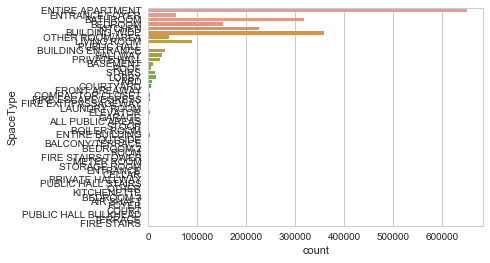

In [154]:
sns.countplot(y="SpaceType", data=prob)
plt.show()

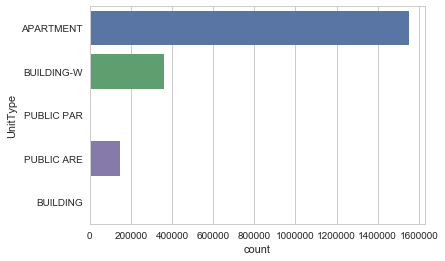

In [155]:
sns.countplot(y="UnitType", data=prob)
get plt.show()

In [171]:
#get dummies for the problem category and boruugh for the logit model

comp2 = pd.get_dummies(comp, columns=['Borough'])
prob2 = pd.get_dummies(prob,columns=['MajorCategory'])

In [173]:
comp2.head()

,ComplaintID,BuildingID,BoroughID,HouseNumber,StreetName,Zip,Block,Lot,Apartment,CommunityBoard,ReceivedDate,StatusID,Status,StatusDate,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND
0,6960137,3418,1,1989,ADAM C POWELL BOULEVARD,10026.0,1904,4,12D,10,07/07/2014,2,CLOSE,07/29/2014,0,0,1,0,0
1,6960832,3512,1,2267,ADAM C POWELL BOULEVARD,10030.0,1918,4,3B,10,07/08/2014,2,CLOSE,07/12/2014,0,0,1,0,0
2,6946867,5318,1,778,11 AVENUE,10019.0,1083,1,4P,4,06/19/2014,2,CLOSE,07/13/2014,0,0,1,0,0
3,6966946,5608,1,1640,AMSTERDAM AVENUE,10031.0,2073,29,5A,9,07/16/2014,2,CLOSE,07/21/2014,0,0,1,0,0
4,6956574,17896,1,230,EAST 88 STREET,10128.0,1533,32,1E,8,07/01/2014,2,CLOSE,07/09/2014,0,0,1,0,0


In [181]:
comp2 = comp2.rename(columns={'Borough_STATEN ISLAND':'Borough_STATEN_ISLAND'})

In [189]:
del comp2['Borough_MANHATTAN']
del comp2['Borough_QUEENS']
del comp2['Borough_STATEN_ISLAND']


In [191]:
comp2.iloc[:,15:]

,Borough_BROOKLYN
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [160]:
print prob2.shape
print prob.shape

(2057764, 33)
(2057764, 18)


In [159]:
prob2.head(2)

,ProblemID,ComplaintID,UnitTypeID,UnitType,SpaceTypeID,SpaceType,TypeID,Type,MajorCategoryID,MinorCategoryID,...,MajorCategory_GENERAL,MajorCategory_HEAT/HOT WATER,MajorCategory_HEATING,MajorCategory_NONCONST,MajorCategory_OUTSIDE BUILDING,MajorCategory_PAINT/PLASTER,MajorCategory_PLUMBING,MajorCategory_SAFETY,MajorCategory_UNSANITARY CONDITION,MajorCategory_WATER LEAK
0,17307278,8412850,91,APARTMENT,543,ENTIRE APARTMENT,1,EMERGENCY,56,337,...,0,0,0,0,0,0,0,0,0,0
1,17317058,8417365,91,APARTMENT,543,ENTIRE APARTMENT,3,NON EMERGENCY,63,376,...,0,0,0,0,0,0,0,0,1,0


In [194]:
df_merged = pd.merge(prob2, comp2 , on = 'ComplaintID', how = "inner")

In [195]:
df_merged.shape

(2057664, 48)

In [200]:
X = df_merged.iloc[:,47:]

In [225]:
y = df_merged.iloc[:,17:33]

In [211]:
X.head()

,Borough_BROOKLYN
0,0
1,0
2,0
3,0
4,0


In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [227]:
y_test.shape

(514416, 16)

In [228]:
X_train.shape

(1543248, 1)

In [230]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

ValueError: bad input shape (1543248, 16)